## Algerian Forest Fire Dataset - Temperature Prediction

* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Linear Regression Model Training
* Ridge Regression Model Training
* Lasso Regression Model Training
* Elasticnet Regression Model Training

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Data Reading And Cleaning

In [2]:
pd.pandas.set_option('display.max_rows',None)
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

#### drop the row index 122 and 123 where some text have been added

In [3]:
df.drop([122,123],inplace=True)

#### resteing the index of the rows

In [4]:
df.reset_index(inplace=True)

#### Stripping The Name of The Colummns

In [5]:
df.columns = [colum.strip() for colum in df.columns]
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

#### Dropping the Classes Features

In [30]:
df.drop('Classes',axis=1,inplace=True)
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,1
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,2012-06-02,1
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,1
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,2012-06-04,1
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,2012-06-05,1


#### Dropping the index Features

In [33]:
df.drop('index',axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,2012-06-02,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,2012-06-04,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,2012-06-05,1


#### Replacing the day,month,year feature with date feature

In [7]:
df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date
0,0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01
1,1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03
3,3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04
4,4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05


#### Adding a new feature 'Region'

In [8]:
## Creating feature called Region,add value 0 for Bejaia Region and add value 1 for Sidi Bel-abbes Region
df["Region"]=1
for i in range(len(df)):
    if i <= 121:
        df["Region"][i]=1
    else:
        df["Region"][i]=0

In [9]:
df.head()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date,Region
0,0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,2012-06-01,1
1,1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,2012-06-02,1
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,2012-06-03,1
3,3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,2012-06-04,1
4,4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,2012-06-05,1


#### Checking the datatypes of features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        244 non-null    int64         
 1   Temperature  244 non-null    object        
 2   RH           244 non-null    object        
 3   Ws           244 non-null    object        
 4   Rain         244 non-null    object        
 5   FFMC         244 non-null    object        
 6   DMC          244 non-null    object        
 7   DC           244 non-null    object        
 8   ISI          244 non-null    object        
 9   BUI          244 non-null    object        
 10  FWI          244 non-null    object        
 11  date         244 non-null    datetime64[ns]
 12  Region       244 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 24.9+ KB


#### Changing the datatypes of features

In [15]:
colum_list = df.columns

In [27]:
df.at[165,'DC'] = 14.6
df.at[165,'ISI'] = 9
df.at[165,'BUI'] = 12.5
df.at[165,'FWI'] = 10.4

In [28]:
temp = 0
for colum in colum_list[1:11]:
    if temp<3:
        df[colum]=df[colum].astype(int)
        temp = temp + 1
        
    else:
        df[colum]=df[colum].astype(float)
        

In [34]:
df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
date           datetime64[ns]
Region                  int64
dtype: object

#### Applying Label encoding in DC,FWI,region features

In [35]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [36]:
df['DC']=LabelEncoder.fit_transform(df['DC'])
df['FWI']=LabelEncoder.fit_transform(df['FWI'])
df['Region']=LabelEncoder.fit_transform(df['Region'])

In [37]:
df.dtypes

Temperature             int32
RH                      int32
Ws                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                      int64
ISI                   float64
BUI                   float64
FWI                     int64
date           datetime64[ns]
Region                  int64
dtype: object

#### Checking the null values

In [38]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
date           0
Region         0
dtype: int64

## Univariate Analysis

In [39]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [40]:
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'date',
 'Region']

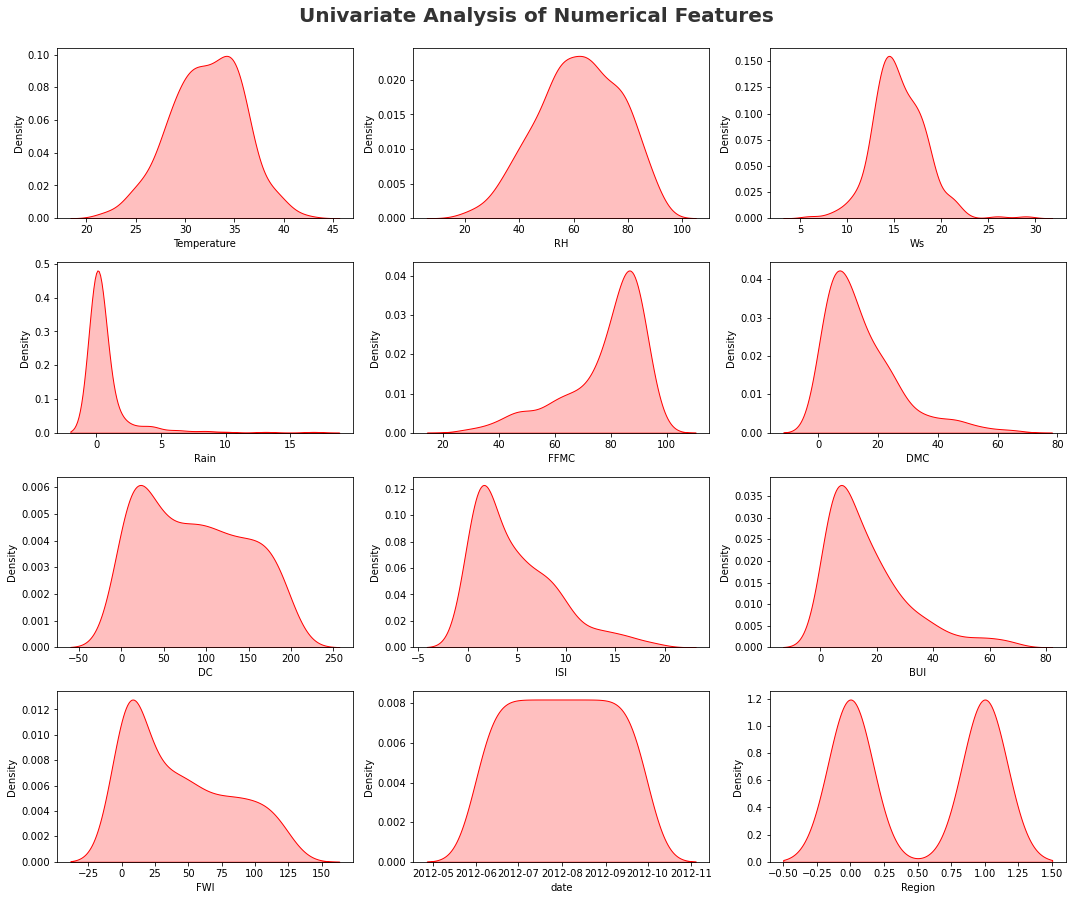

In [41]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Visualization of Target Feature

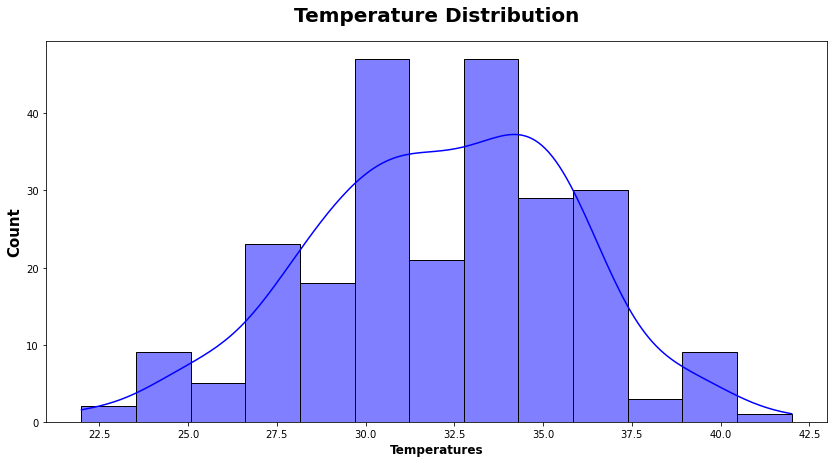

In [42]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec = "black", color='blue', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()

## Creating Dependent and Independent features

In [43]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'date', 'Region'],
      dtype='object')

In [44]:
# Independent Features

X = pd.DataFrame(df,columns=['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI','Region'])

# Dependent Features
y = pd.DataFrame(df,columns=['Temperature'])

## Independent Features

In [45]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,6,1.3,3.4,5,1
1,61,13,1.3,64.4,4.1,6,1.0,3.9,4,1
2,82,22,13.1,47.1,2.5,2,0.3,2.7,1,1
3,89,13,2.5,28.6,1.3,0,0.0,1.7,0,1
4,77,16,0.0,64.8,3.0,30,1.2,3.9,5,1
5,67,14,0.0,82.6,5.8,53,3.1,7.0,19,1
6,54,13,0.0,88.2,9.9,76,6.4,10.9,50,1
7,73,15,0.0,86.6,12.1,93,5.6,13.5,49,1
8,88,13,0.2,52.9,7.9,94,0.4,10.5,3,1
9,79,12,0.0,73.2,9.5,107,1.3,12.6,9,1


## Dependent Features

In [46]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
5,31
6,33
7,30
8,25
9,28


## TrainTest Split

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
X,y,test_size=0.33,random_state=10)

In [49]:
X_train.shape

(163, 10)

In [50]:
X_test.shape

(81, 10)

In [51]:
y_train.shape

(163, 1)

In [52]:
y_test.shape

(81, 1)

## Independent training dataset

In [53]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
237,49,6,2.0,61.3,11.9,70,0.6,11.9,4,0
78,54,18,0.0,89.4,20.0,169,9.7,27.5,97,1
25,64,18,0.0,86.8,17.8,140,6.7,21.6,70,1
124,80,14,2.0,48.7,2.2,6,0.3,2.6,1,0
176,64,9,1.2,73.8,11.7,36,1.1,11.4,7,0
72,51,13,0.3,81.3,15.6,141,2.5,20.7,33,1
233,58,13,0.2,79.5,18.7,153,2.1,24.4,29,0
231,33,13,0.1,90.6,25.8,144,9.0,28.2,94,0
168,81,17,0.0,84.6,21.1,101,4.7,20.9,53,0
188,54,14,3.1,70.5,11.0,19,1.3,10.5,8,0


## Independent Test Dataset

In [54]:
x_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
162,56,15,2.9,74.8,7.1,22,1.6,6.8,8,0
60,64,17,0.0,87.2,31.9,180,6.8,41.2,95,1
61,45,14,0.0,78.8,4.8,27,2.0,4.7,9,1
63,63,14,0.3,76.6,5.7,26,1.7,5.5,8,1
69,59,17,0.0,87.4,14.8,125,6.9,17.9,64,1
83,53,16,0.0,89.5,37.6,186,10.4,47.5,115,1
55,53,19,0.0,89.2,17.1,163,10.0,23.9,93,1
211,53,17,0.5,80.2,20.7,182,2.7,30.6,41,0
46,70,14,0.0,82.8,9.4,83,3.2,11.1,27,1
35,63,14,0.0,87.0,10.9,89,5.6,12.5,48,1


## Dependent Training Dataset

In [55]:
y_train

,Temperature
237,26
78,36
25,31
124,29
176,39
72,35
233,34
231,36
168,32
188,30


## Dependent Test Dataset

In [56]:
y_test

,Temperature
162,34
60,35
61,36
63,35
69,35
83,36
55,36
211,35
46,29
35,32


## Standardizing or Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [58]:
scaler

StandardScaler()

In [59]:
x_train = scaler.fit_transform(x_train)

In [60]:
x_test = scaler.transform(x_test)

In [61]:
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32636097,
        -0.99203343, -0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76499972,
         1.43114329,  1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35224151,
         0.72764037,  1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08639724,
         0.54525073, -0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76710278,
        -0.83569944, -0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27738965,
        -0.86175511,  1.01857744]])

## Model Training

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
regression=LinearRegression()

In [64]:
regression

LinearRegression()

In [65]:
regression.fit(x_train,y_train)

LinearRegression()

## Coefficient

In [66]:
print(regression.coef_)

[[-1.20669975 -0.54209568 -0.31159321  1.04482305 -1.29670239 -0.50781556
  -0.42115789  1.64654782  0.94498691 -0.20318113]]


## Intercept

In [67]:
print(regression.intercept_)

[32.17791411]


## Precdiction for Test Data

In [68]:
reg_pred=regression.predict(x_test)
reg_pred

array([[31.8978398 ],
       [33.61950931],
       [33.39295368],
       [31.74765605],
       [32.81418334],
       [35.07599543],
       [33.56268004],
       [33.30621589],
       [31.78945588],
       [32.88041459],
       [33.84045421],
       [27.72991872],
       [35.39902142],
       [29.41566144],
       [32.04200838],
       [32.31165355],
       [34.10303528],
       [28.25791024],
       [36.23568073],
       [34.72709317],
       [32.42428134],
       [34.31650416],
       [33.6642377 ],
       [33.09592771],
       [35.86048279],
       [29.14029209],
       [31.54458933],
       [33.10341121],
       [27.73069625],
       [32.24575847],
       [25.9015769 ],
       [27.33705297],
       [33.88109104],
       [32.17541142],
       [32.72259031],
       [30.81107576],
       [28.61026575],
       [32.73486721],
       [27.9218661 ],
       [35.41644529],
       [32.81381681],
       [34.22643779],
       [34.30382128],
       [31.29450192],
       [36.56768693],
       [34

<AxesSubplot:ylabel='Density'>

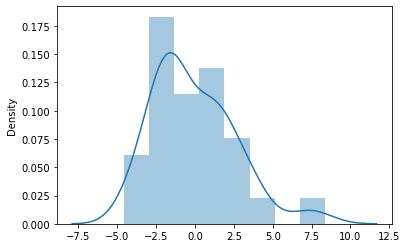

In [69]:
import seaborn as sns
sns.distplot(reg_pred-y_test)

## Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

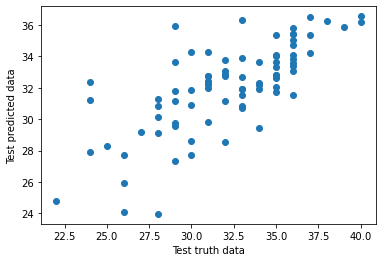

In [70]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

## Assumption of Linear Regression

Text(0, 0.5, 'Test predicted data')

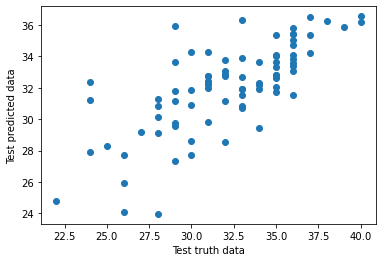

In [74]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test truth data")
plt.ylabel('Test predicted data')

## Residuals

In [71]:
residual=y_test-reg_pred

In [72]:
residual

,Temperature
162,2.102160
60,1.380491
61,2.607046
63,3.252344
69,2.185817
83,0.924005
55,2.437320
211,1.693784
46,-2.789456
35,-0.880415


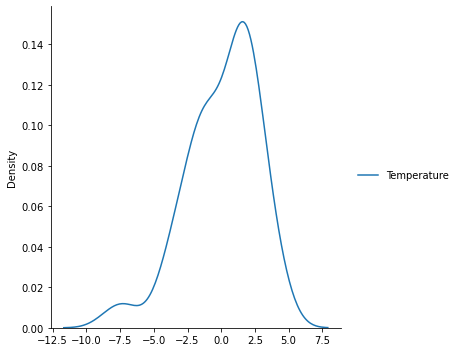

In [73]:
sns.displot(residual,kind='kde')

## Scatterplot with prediction and residual

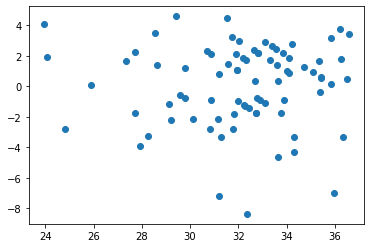

In [75]:
plt.scatter(reg_pred,residual)

## Performance Metrics

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.015474461946448
2.1629003232741053
2.648674095079734


## R square and adjusted R square

In [77]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5360869202681906


## Adjusted R square

In [78]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4698136231636464